## Portfolio Optimization utilizing Riskfolio 

In [138]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from plotly.offline import iplot as py
import seaborn as sns
import riskfolio as rp
import quantstats as qs
import cvxpy as cp
from scipy.stats import norm
from datetime import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4%}'.format

In [139]:
assets = ['TSLA', 'AAPL', 'AMZN', 'META', 'GOOG', 'LMT', 'SPY', 'QQQ']
assets

['TSLA', 'AAPL', 'AMZN', 'META', 'GOOG', 'LMT', 'SPY', 'QQQ']

In [140]:
assets.sort()

In [141]:
start_date = '2019-08-01'
end_date = '2023-07-20'

In [142]:
n_assets = len(assets)

In [143]:
prices = pd.DataFrame()
prices_df = yf.download(assets, start = start_date, end = end_date)

[*********************100%***********************]  8 of 8 completed


In [144]:
prices_df.head().dropna()

Adj Close                                                \
                 AAPL       AMZN       GOOG         LMT        META   
Date                                                                  
2019-08-01 5055.5870% 9276.5999% 6045.0500% 32659.2682% 19272.9996%   
2019-08-02 4948.6202% 9116.2003% 5969.9501% 32553.1311% 18902.0004%   
2019-08-05 4689.5702% 8825.6500% 5761.6001% 32240.1093% 18172.9996%   
2019-08-06 4778.3463% 8939.1502% 5849.7501% 32991.1774% 18450.9995%   
2019-08-07 4827.8282% 8966.9998% 5869.9501% 33217.8467% 18514.9994%   

                                                   Close             ...  \
                   QQQ         SPY       TSLA       AAPL       AMZN  ...   
Date                                                                 ...   
2019-08-01 18546.9315% 27632.1869% 1559.0000% 5210.7498% 9276.5999%  ...   
2019-08-02 18273.8235% 27424.1333% 1562.2667% 5100.5001% 9116.2003%  ...   
2019-08-05 17628.1174% 26599.4110% 1522.1333% 4833.4999% 8825.6500%  ...   
2019-08-06 17874.8932% 26972.4091% 1538.3333% 4925.0000% 8939.1502%  ...   
2019-08-07 17971.4569% 26988.3423% 1556.1333% 4975.9998% 8966.9998%  ...   

                  Open                Volume                                \
                   SPY       TSLA       AAPL       AMZN      GOOG      LMT   
Date                                                                         
2019-08-01 29760.0006% 1617.6666%  216071600   94266000  33970000  1220300   
2019-08-02 29385.0006% 1542.3333%  163448400   99124000  32902000   836300   
2019-08-05 28808.9996% 1530.6667%  209572000  121164000  51950000  1464600   
2019-08-06 28591.0004% 1545.8667%  143299200  101406000  34188000  1124900   
2019-08-07 28439.9994% 1510.0000%  133457600   90538000  28886000  1243000   

                                                      
                META       QQQ        SPY       TSLA  
Date                                                  
2019-08-01  17777000  63251600  142646600  123892500  
2019-08-02  15297000  55214000  116749700   92047500  
2019-08-05  23086700  75040000  178745400  105424500  
2019-08-06  18035700  41897200  120711700   83463000  
2019-08-07  15833200  49990600  140572300   71647500  

[5 rows x 48 columns]

In [145]:
prices_df.tail().dropna()

Adj Close                                                  \
                  AAPL        AMZN        GOOG         LMT        META   
Date                                                                     
2023-07-13 19053.9993% 13430.0003% 12483.0002% 46638.0005% 31341.0004%   
2023-07-14 19069.0002% 13467.9993% 12569.9997% 46430.9998% 30886.9995%   
2023-07-17 19399.0005% 13355.9998% 12505.9998% 46997.0001% 31061.9995%   
2023-07-18 19372.9996% 13283.0002% 12408.0002% 45570.0012% 31204.9988%   
2023-07-19 19510.0006% 13536.0001% 12277.9999% 45151.0010% 31601.0010%   

                                                     Close              ...  \
                   QQQ         SPY        TSLA        AAPL        AMZN  ...   
Date                                                                    ...   
2023-07-13 37914.9994% 44955.9998% 27789.9994% 19053.9993% 13430.0003%  ...   
2023-07-14 37907.0007% 44927.9999% 28138.0005% 19069.0002% 13467.9993%  ...   
2023-07-17 38260.9985% 45083.9996% 29038.0005% 19399.0005% 13355.9998%  ...   
2023-07-18 38573.9990% 45419.0002% 29333.9996% 19372.9996% 13283.0002%  ...   
2023-07-19 38564.9994% 45520.0012% 29126.0010% 19510.0006% 13536.0001%  ...   

                  Open                Volume                               \
                   SPY        TSLA      AAPL      AMZN      GOOG      LMT   
Date                                                                        
2023-07-13 44789.9994% 27458.9996%  41342300  61170900  31535900   821700   
2023-07-14 45048.0011% 27701.0010%  41573900  54388100  20482800   932900   
2023-07-17 44913.0005% 28663.0005%  50520200  48450200  20675300  1886300   
2023-07-18 45050.0000% 29014.9994%  48353800  54969100  21071200  3122600   
2023-07-19 45501.0010% 29604.0009%  80507300  54531000  22313800  2141500   

                                                     
                META       QQQ       SPY       TSLA  
Date                                                 
2023-07-13  30281000  46960000  72425200  112681500  
2023-07-14  22576000  55097800  69761800  119771100  
2023-07-17  25323100  40868900  52680200  131569600  
2023-07-18  20764600  55343400  80744400  112434700  
2023-07-19  21763700  54093000  65891700  142355400  

[5 rows x 48 columns]

In [146]:
prices_df["Adj Close"].tail().dropna()

,AAPL,AMZN,GOOG,LMT,META,QQQ,SPY,TSLA
Date,,,,,,,,
2023-07-13,19053.9993%,13430.0003%,12483.0002%,46638.0005%,31341.0004%,37914.9994%,44955.9998%,27789.9994%
2023-07-14,19069.0002%,13467.9993%,12569.9997%,46430.9998%,30886.9995%,37907.0007%,44927.9999%,28138.0005%
2023-07-17,19399.0005%,13355.9998%,12505.9998%,46997.0001%,31061.9995%,38260.9985%,45083.9996%,29038.0005%
2023-07-18,19372.9996%,13283.0002%,12408.0002%,45570.0012%,31204.9988%,38573.9990%,45419.0002%,29333.9996%
2023-07-19,19510.0006%,13536.0001%,12277.9999%,45151.0010%,31601.0010%,38564.9994%,45520.0012%,29126.0010%


<Axes: xlabel='Date'>

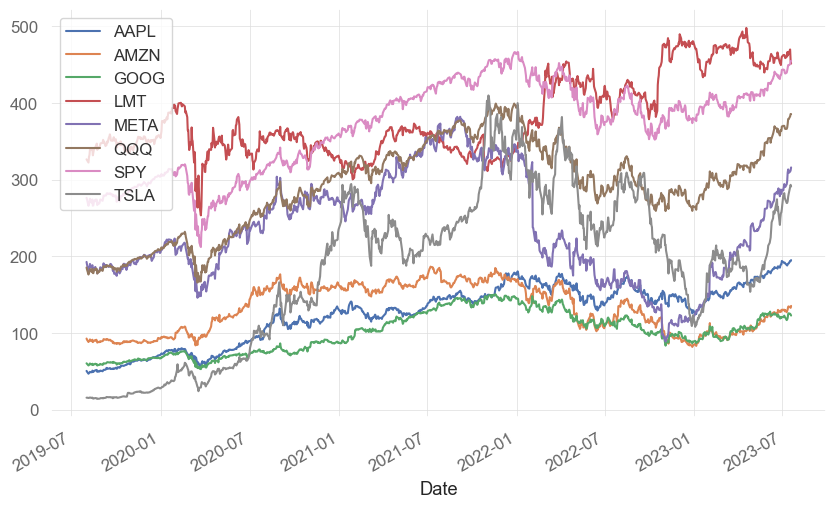

In [147]:
prices_df['Adj Close'].plot()

In [148]:
returns = prices_df['Adj Close'].pct_change().dropna()
returns

,AAPL,AMZN,GOOG,LMT,META,QQQ,SPY,TSLA
Date,,,,,,,,
2019-08-02,-2.1158%,-1.7291%,-1.2423%,-0.3250%,-1.9250%,-1.4725%,-0.7529%,0.2095%
2019-08-05,-5.2348%,-3.1872%,-3.4900%,-0.9616%,-3.8567%,-3.5335%,-3.0073%,-2.5689%
2019-08-06,1.8931%,1.2860%,1.5300%,2.3296%,1.5297%,1.3999%,1.4023%,1.0643%
2019-08-07,1.0355%,0.3115%,0.3453%,0.6871%,0.3469%,0.5402%,0.0591%,1.1571%
2019-08-08,2.2056%,2.2020%,2.6244%,2.1311%,2.7059%,2.1764%,1.9620%,2.0907%
...,...,...,...,...,...,...,...,...
2023-07-13,0.4057%,2.6758%,4.3555%,0.9568%,1.3157%,1.6979%,0.7937%,2.1729%
2023-07-14,0.0787%,0.2829%,0.6969%,-0.4438%,-1.4486%,-0.0211%,-0.0623%,1.2523%
2023-07-17,1.7306%,-0.8316%,-0.5091%,1.2190%,0.5666%,0.9339%,0.3472%,3.1985%


<Axes: xlabel='Date'>

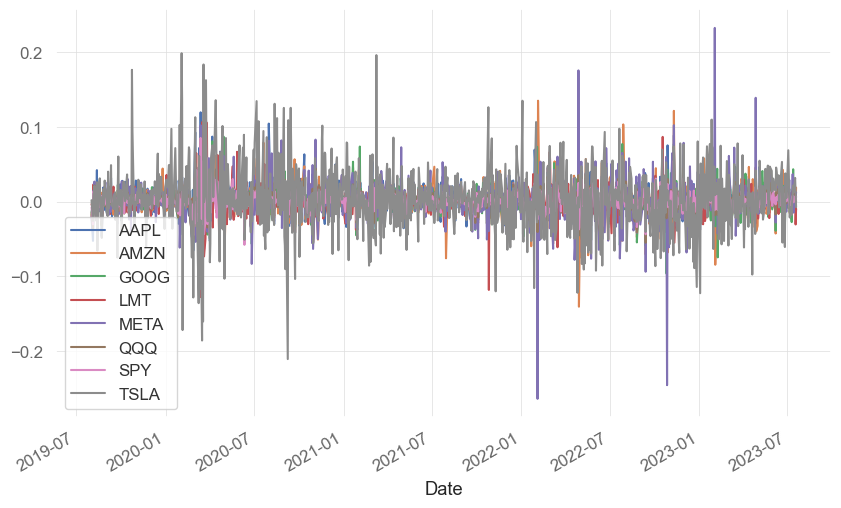

In [149]:
returns.plot()

In [150]:
returns.describe()

,AAPL,AMZN,GOOG,LMT,META,QQQ,SPY,TSLA
count,99700.0000%,99700.0000%,99700.0000%,99700.0000%,99700.0000%,99700.0000%,99700.0000%,99700.0000%
mean,0.1584%,0.0649%,0.0925%,0.0478%,0.0935%,0.0883%,0.0604%,0.3859%
std,2.1384%,2.3234%,2.0701%,1.7428%,2.9336%,1.7197%,1.4341%,4.2904%
min,-12.8647%,-14.0494%,-11.1008%,-12.7616%,-26.3901%,-11.9788%,-10.9424%,-21.0628%
25%,-0.8826%,-1.1558%,-0.9124%,-0.6873%,-1.2062%,-0.7570%,-0.5545%,-1.7937%
50%,0.1234%,0.0719%,0.1077%,0.0709%,0.1165%,0.1383%,0.0899%,0.2767%
75%,1.3510%,1.2351%,1.1336%,0.8000%,1.4684%,0.9954%,0.7834%,2.4619%
max,11.9808%,13.5359%,9.4017%,10.7279%,23.2824%,8.4705%,9.0603%,19.8949%


In [151]:
portfolio = rp.Portfolio(returns = returns)

In [152]:
method_mu = 'hist'
method_cov = 'hist'
hist = True
model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
l = 0


In [155]:
from fredapi import Fred


fred = Fred(api_key = 'c468eb73f41cc7713de37d8e25ab93ec')
ten_y_treasury_rate = fred.get_series_latest_release('GS10') / 100

#set the risk free rate
rf = ten_y_treasury_rate.iloc[-1]
print(rf)

0.0375


In [156]:
portfolio.assets_stats(method_mu = 'hist', method_cov = 'hist', d = 0.94)

In [157]:
w_rp = portfolio.rp_optimization(model = 'Classic', rm = 'MV', hist = True, rf = 0, b = None)

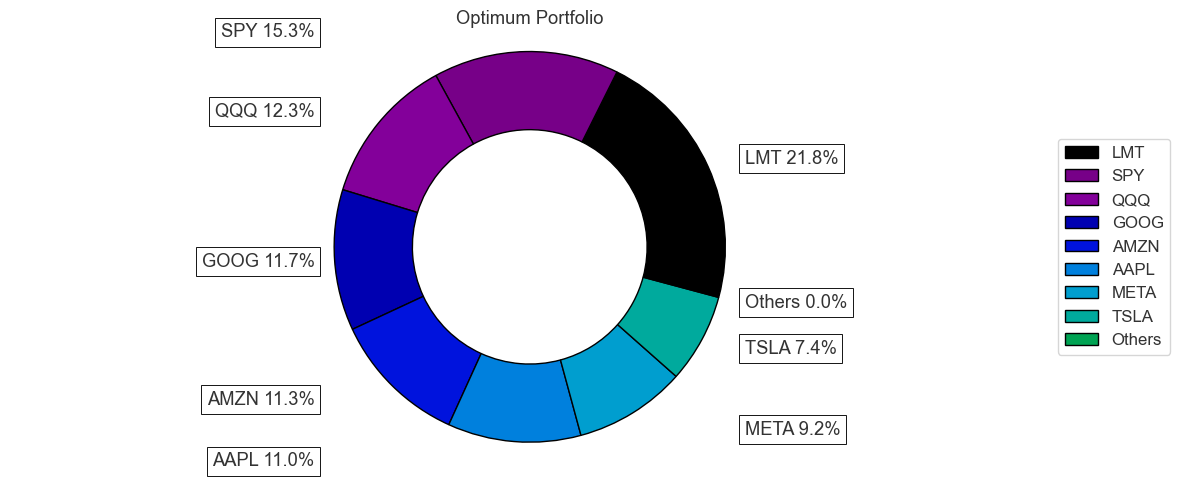

In [158]:
ax = rp.plot_pie(w=w_rp, title = "Optimum Portfolio", cmap = 'nipy_spectral', height = 5, width = 12, ax=None)

In [159]:
points = 50 # Number of Frontier points

frontier = portfolio.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,AMZN,GOOG,LMT,META,QQQ,SPY,TSLA
0,0.0000%,3.7516%,0.0000%,31.1210%,0.0000%,0.0000%,65.1274%,0.0000%
1,4.0470%,1.3673%,0.0562%,32.1326%,0.0000%,0.0000%,56.3259%,6.0710%
2,10.9830%,0.0000%,1.8949%,34.2365%,0.0000%,0.0000%,44.0316%,8.8540%
3,16.8340%,0.0000%,3.0260%,36.2626%,0.0000%,0.0000%,32.6393%,11.2380%
4,22.0486%,0.0000%,4.0440%,38.0713%,0.0000%,0.0000%,22.4729%,13.3632%


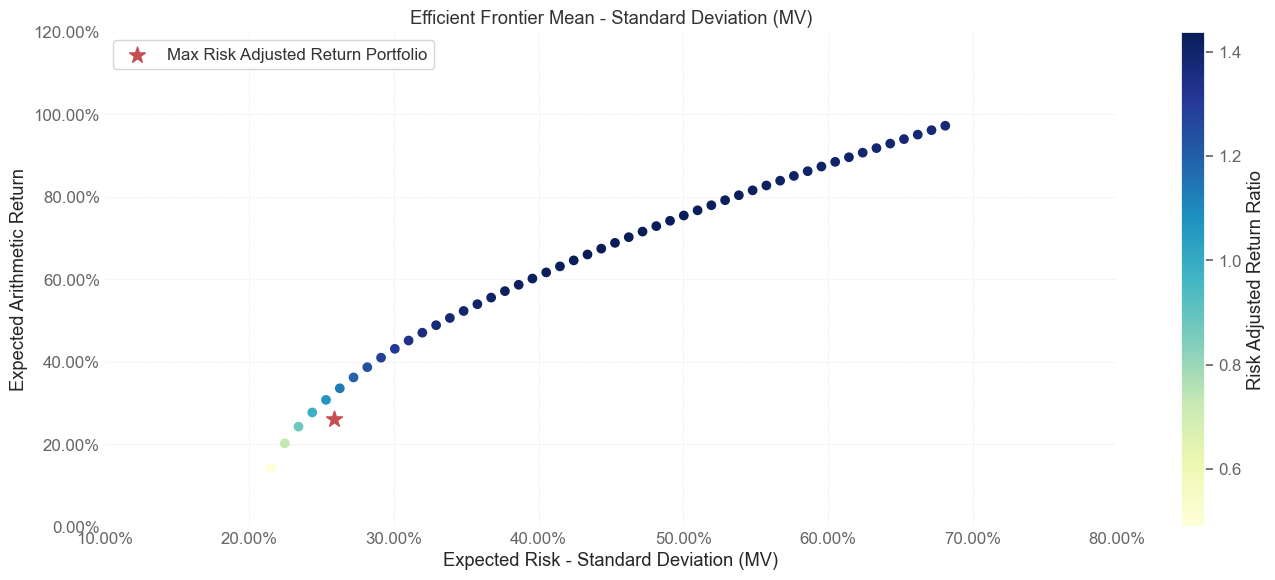

In [160]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' #title of point
mu = portfolio.mu # Expected Returns
cov = portfolio.cov #cov matrix
returns = portfolio.returns # returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf = rf, alpha = 0.5, cmap = 'YlGnBu', w=w_rp, label=label,
                      marker = '*', s=12, c='r', height=6, width=14, ax=None)


In [161]:
frontier

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
AAPL,0.0000%,4.0470%,10.9830%,16.8340%,22.0486%,26.8450%,31.3414%,34.9570%,37.6499%,39.6862%,...,17.2501%,15.2844%,13.3329%,11.3945%,9.4686%,7.5543%,5.6509%,3.7578%,1.8743%,0.0000%
AMZN,3.7516%,1.3673%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
GOOG,0.0000%,0.0562%,1.8949%,3.0260%,4.0440%,4.9790%,5.8592%,4.8251%,1.9556%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
LMT,31.1210%,32.1326%,34.2365%,36.2626%,38.0713%,39.7324%,41.2954%,41.0325%,39.0115%,36.8155%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
META,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
QQQ,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
SPY,65.1274%,56.3259%,44.0316%,32.6393%,22.4729%,13.1262%,4.3548%,0.0000%,0.0000%,0.0000%,...,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
TSLA,0.0000%,6.0710%,8.8540%,11.2380%,13.3632%,15.3174%,17.1491%,19.1855%,21.3830%,23.4982%,...,82.7499%,84.7156%,86.6671%,88.6055%,90.5314%,92.4457%,94.3491%,96.2422%,98.1257%,100.0000%


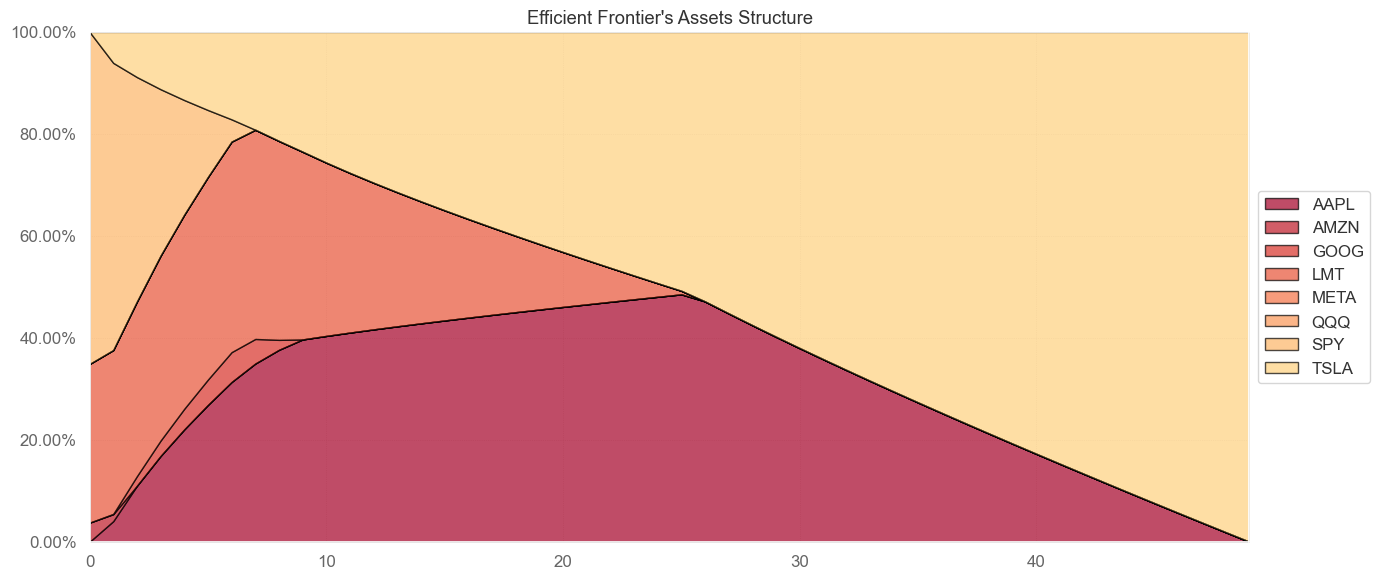

In [162]:
ax = rp.plot_frontier_area(w_frontier=frontier, cmap='RdYlGn', height=6, width=14, ax=None)

In [ ]:
ax = rp.jupyter_report(returns, w_rp, rm=rm, rf=0, alpha=0.05, height=8, width=14, nrow=25)
plt.show()

## Calculating the portfolio that maximizes mean/CVaR

In [ ]:
# rm:Risk Measure
rm = 'CVaR'
alpha = 0.05
w_rp = portfolio.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w_rp)

In [ ]:
ax = rp.plot_pie(w=w_rp, title='Max Mean/CVaR Ratio', others=0.05, nrow=25, cmap='tab20b', height=5, width=12, ax=None)

In [ ]:
# Plotting max risk adj port

label = 'Max Risk Adjusted Return Portfolio'
ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm, rf=rf, alpha=alpha, cmap='RdYlGn',
                     w=w_rp, label=label, marker='*', s=16, c='r', height=6, width=14, ax=None)

In [ ]:
# Plot efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap='tab20', height=5, width=13, ax=None)